In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


read the data

In [19]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
breast_cancer_df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
breast_cancer_df['label'] = breast_cancer_dataset.target

get some info about the data

In [20]:
print(breast_cancer_df.describe())
print('-------------------------------------------')
print(breast_cancer_df.isnull().sum())
print('-------------------------------------------')
print(breast_cancer_df.label.value_counts()) # 1 = benign

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

split the data

In [22]:
X = breast_cancer_df.drop(columns = 'label', axis = 1)
Y = breast_cancer_df.label
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

create and train the model

In [25]:
logistic_regression = LogisticRegression(max_iter = 10000)
logistic_regression.fit(X_train, Y_train)

Y_train_prediction = logistic_regression.predict(X_train)
accuracy_score_train_data = accuracy_score(Y_train, Y_train_prediction)
print('accuracy score for training data =', accuracy_score_train_data)

confusion_matrix_train_data = confusion_matrix(Y_train, Y_train_prediction)

accuracy score for training data = 0.9692307692307692


visualise confusion for train data

<Axes: >

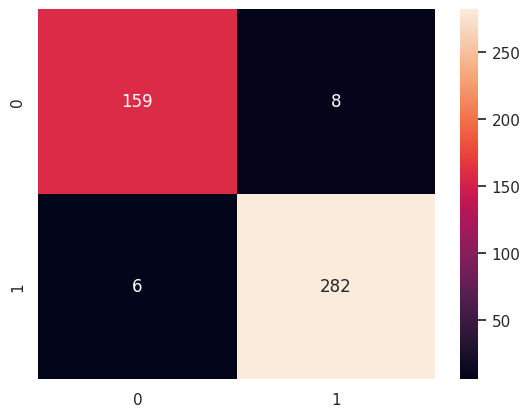

In [29]:
sns.set()
sns.heatmap(confusion_matrix_train_data, annot = True, fmt = '.4g')

evalue the model for test data

In [27]:
Y_test_prediction = logistic_regression.predict(X_test)
accuracy_score_test_data = accuracy_score(Y_test, Y_test_prediction)
print('accuracy score for test data =', accuracy_score_test_data)

confusion_matrix_test_data = confusion_matrix(Y_test, Y_test_prediction)

accuracy score for test data = 0.9298245614035088


visualise confusion for test data

<Axes: >

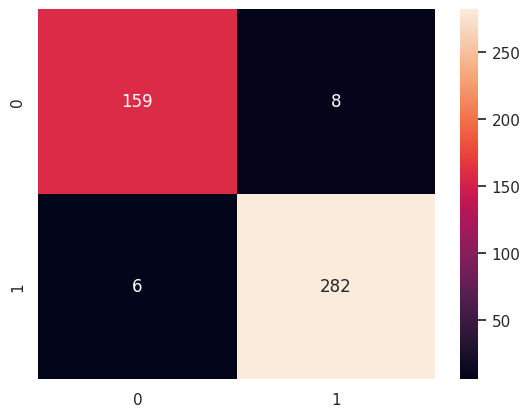

In [30]:
sns.heatmap(confusion_matrix_train_data, annot = True, fmt = '.4g')